In [2]:
import pandas as pd
data={
    'City':['Kathmandu','Pokhara','Lalitpur'],
    'Population':[100000,50000,30000],

}
df=pd.DataFrame(data)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        3 non-null      object
 1   Population  3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 176.0+ bytes
None


<Axes: xlabel='City'>

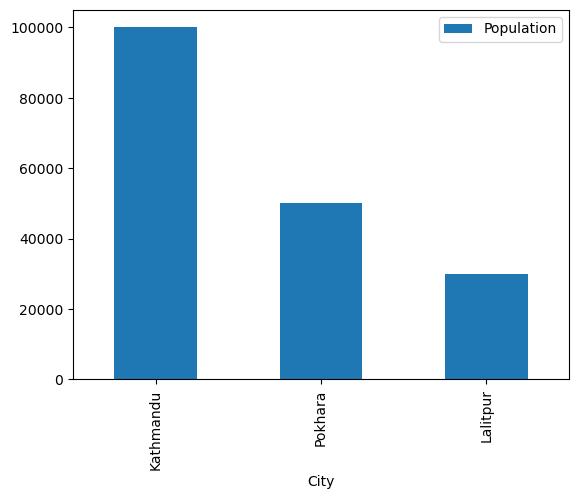

In [6]:

df.plot.bar(x='City',y='Population')

<Axes: ylabel='Population'>

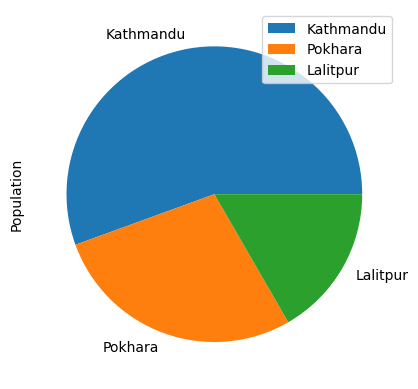

In [8]:
df.plot.pie(x='City',y='Population',labels=df['City'])


In [21]:
df_students=pd.DataFrame({
    'StudentID':[1,2,3],
    'Name':['Ram','Hari','Shyam']
})
df_marks=pd.DataFrame({
    'StudentID':[1,2,4],
    'Marks':[10,20,30]
    
})
print(df_students)
print(df_marks)


   StudentID   Name
0          1    Ram
1          2   Hari
2          3  Shyam
   StudentID  Marks
0          1     10
1          2     20
2          4     30


In [22]:
merge_inner = df_students.merge(df_marks, on='StudentID', how='inner')
print(merge_inner)


   StudentID  Name  Marks
0          1   Ram     10
1          2  Hari     20


In [23]:
merge_inner = pd.merge(df_students,df_marks, on='StudentID', how='left')
print(merge_inner)

   StudentID   Name  Marks
0          1    Ram   10.0
1          2   Hari   20.0
2          3  Shyam    NaN


In [24]:
merge_inner = pd.merge(df_students,df_marks, on='StudentID', how='right')
print(merge_inner)

   StudentID  Name  Marks
0          1   Ram     10
1          2  Hari     20
2          4   NaN     30


In [25]:
df_A=pd.DataFrame({
    'Temperature':[20,22,24]  
},index=['Day1','Day2','Day3'])
df_B=pd.DataFrame({
    'Humidity':[60,65,70]  
},index=['Day1','Day2','Day4'])


In [32]:
df_join=df_A.join(df_B,how='inner')
print(df_join)

      Temperature  Humidity
Day1           20        60
Day2           22        65


In [33]:
df_join=df_B.join(df_A,how='inner')
print(df_join)

      Humidity  Temperature
Day1        60           20
Day2        65           22


In [34]:
df_join=df_B.join(df_A,how='cross')
print(df_join)

   Humidity  Temperature
0        60           20
1        60           22
2        60           24
3        65           20
4        65           22
5        65           24
6        70           20
7        70           22
8        70           24


In [42]:
df_wide=pd.DataFrame({
    'Name':['Ram','Hari'],
    'Maths':[80,90],
    'Science':[23,24]
    
})
print(df_wide)

   Name  Maths  Science
0   Ram     80       23
1  Hari     90       24


In [44]:
df_long=pd.melt(
    df_wide,
    id_vars=['Name'],
    var_name='Subject',
    value_name='Score'
)
print(df_long)

   Name  Subject  Score
0   Ram    Maths     80
1  Hari    Maths     90
2   Ram  Science     23
3  Hari  Science     24


In [ ]:
df_original=df_long.pivot(
    index='Name',
    columns='Subject',
    values='Score'
)
print(df_original)df_original=df_long.pivot(
    index='Name',
    columns='Subject',
    values='Score'
)
print(df_original)

Subject  Maths  Science
Name                   
Hari        90       24
Ram         80       23


In [46]:
df_stacked=df_long.stack()
print(df_stacked)

0  Name           Ram
   Subject      Maths
   Score           80
1  Name          Hari
   Subject      Maths
   Score           90
2  Name           Ram
   Subject    Science
   Score           23
3  Name          Hari
   Subject    Science
   Score           24
dtype: object


In [47]:
df_unstacked=df_long.unstack()
print(df_unstacked)

Name     0        Ram
         1       Hari
         2        Ram
         3       Hari
Subject  0      Maths
         1      Maths
         2    Science
         3    Science
Score    0         80
         1         90
         2         23
         3         24
dtype: object


In [ ]:
pivot_df=df_long